# Sequential feature selector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Store data in dataframe
dfX = pd.DataFrame(data=X, columns=dataObj.feature_names)
cols = dfX.columns

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Forward selection

In [2]:
nFordArray = []
accFordArray = []

for n in list(range(1,cols.shape[0])):
#for n in list(range(1,2)):
    # Classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Create selector object
    sel = SequentialFeatureSelector(knn, direction='forward', n_features_to_select=n, scoring='accuracy')

    # Training
    sel.fit(X_train_std, y_train)

    # Transform
    X_train_std_trans = sel.transform(X_train_std)

    # Calculate accuracy
    knn.fit(X_train_std_trans, y_train)
    X_test_std_trans = sel.transform(X_test_std)
    acc = knn.score(X_test_std_trans, y_test)

    # Print selected features
    sup = sel.get_support()
    cols_sel = list(cols[sup])
    cols_sel.sort()
    p = ", ".join([f"{i}" for i in cols_sel])
    print(f'n = {n:2d}, {p}')

    # Storing data
    nFordArray.append(n)
    accFordArray.append(acc)

n =  1, flavanoids
n =  2, color_intensity, flavanoids
n =  3, color_intensity, flavanoids, total_phenols
n =  4, color_intensity, flavanoids, od280/od315_of_diluted_wines, total_phenols
n =  5, color_intensity, flavanoids, magnesium, od280/od315_of_diluted_wines, total_phenols
n =  6, color_intensity, flavanoids, magnesium, od280/od315_of_diluted_wines, proline, total_phenols
n =  7, color_intensity, flavanoids, magnesium, nonflavanoid_phenols, od280/od315_of_diluted_wines, proline, total_phenols
n =  8, alcohol, color_intensity, flavanoids, magnesium, nonflavanoid_phenols, od280/od315_of_diluted_wines, proline, total_phenols
n =  9, alcohol, color_intensity, flavanoids, magnesium, malic_acid, nonflavanoid_phenols, od280/od315_of_diluted_wines, proline, total_phenols
n = 10, alcalinity_of_ash, alcohol, color_intensity, flavanoids, magnesium, malic_acid, nonflavanoid_phenols, od280/od315_of_diluted_wines, proline, total_phenols
n = 11, alcalinity_of_ash, alcohol, color_intensity, flava

## Backward selection

In [3]:
nBackArray = []
accBackArray = []

for n in list(range(cols.shape[0]-1,0,-1)):
    
    knn = KNeighborsClassifier(n_neighbors=3)
    sel = SequentialFeatureSelector(knn, direction='backward', n_features_to_select=n, scoring='accuracy')
    sel.fit(X_train_std, y_train)
    X_train_std_trans = sel.transform(X_train_std)
    
    knn.fit(X_train_std_trans, y_train)
    X_test_std_trans = sel.transform(X_test_std)
    acc = knn.score(X_test_std_trans, y_test)

    sup = sel.get_support()
    cols_sel = list(cols[sup])
    cols_sel.sort()
    p = ", ".join([f"{i}" for i in cols_sel])
    print(f'n = {n:2d}, {p}')
    
    nBackArray.append(n)
    accBackArray.append(acc)

n = 12, alcalinity_of_ash, alcohol, ash, color_intensity, flavanoids, hue, magnesium, malic_acid, od280/od315_of_diluted_wines, proanthocyanins, proline, total_phenols
n = 11, alcalinity_of_ash, alcohol, ash, color_intensity, flavanoids, hue, magnesium, malic_acid, od280/od315_of_diluted_wines, proline, total_phenols
n = 10, alcalinity_of_ash, alcohol, color_intensity, flavanoids, hue, magnesium, malic_acid, od280/od315_of_diluted_wines, proline, total_phenols
n =  9, alcalinity_of_ash, alcohol, color_intensity, flavanoids, hue, magnesium, malic_acid, od280/od315_of_diluted_wines, proline
n =  8, alcalinity_of_ash, alcohol, color_intensity, flavanoids, hue, magnesium, od280/od315_of_diluted_wines, proline
n =  7, alcalinity_of_ash, alcohol, color_intensity, flavanoids, hue, magnesium, proline
n =  6, alcohol, color_intensity, flavanoids, hue, magnesium, proline
n =  5, alcohol, color_intensity, flavanoids, hue, proline
n =  4, alcohol, color_intensity, flavanoids, proline
n =  3, color

## Comparing results

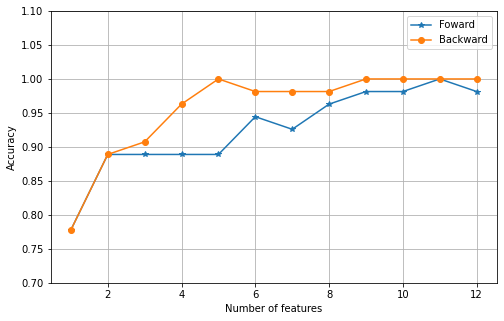

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nFordArray, accFordArray, marker='*')
ax.plot(nBackArray, accBackArray, marker='o')
ax.grid()
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of features')
ax.set_ylim([0.7, 1.1])
ax.legend(['Foward', 'Backward'])

## Choose n=5 with backward selection

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

# Create selector object
sel = SequentialFeatureSelector(knn, direction='backward', n_features_to_select=5, scoring='accuracy')

# Training
sel.fit(X_train_std, y_train)

# Get column boolean
sup = sel.get_support()
print('\nSupport array')
print('-'*30)
print(*sup, sep=', ')



Support array
------------------------------
True, False, False, False, False, False, True, False, False, True, True, False, True


In [6]:
# Print columns
cols_sel = cols[sup]
print('\nChosen columns')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = cols[np.logical_not(sup)]
print(f'\nRemoved columns')
print('-'*30)
print(*cols_rem, sep=', ')


Chosen columns
------------------------------
alcohol, flavanoids, color_intensity, hue, proline

Removed columns
------------------------------
malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, nonflavanoid_phenols, proanthocyanins, od280/od315_of_diluted_wines


In [7]:
# Transformation (remove column)
X_sel = sel.transform(X)

# Show data
dfX_sel = pd.DataFrame(data=X_sel, columns=cols_sel)
display(dfX_sel)

,alcohol,flavanoids,color_intensity,hue,proline
0,14.23,3.06,5.64,1.04,1065.0
1,13.20,2.76,4.38,1.05,1050.0
2,13.16,3.24,5.68,1.03,1185.0
3,14.37,3.49,7.80,0.86,1480.0
4,13.24,2.69,4.32,1.04,735.0
...,...,...,...,...,...
173,13.71,0.61,7.70,0.64,740.0
174,13.40,0.75,7.30,0.70,750.0
175,13.27,0.69,10.20,0.59,835.0
176,13.17,0.68,9.30,0.60,840.0
